In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skmob
from scipy import stats
from skmob.measures.individual import distance_straight_line, maximum_distance, number_of_visits, waiting_times, real_entropy
import math
from tqdm import tqdm
from numpy.linalg import norm
import traja


/home/ryn/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
def ccw(A,B,C):
    return ((C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0]))

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    return (ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D))

def get_crossings(a,get_crossings_vals = False):
    a = np.asarray(a)
    count = 0
    ni = 0
    crossings =[]
    for i in range(len(a)-1):
        for j in range(i+2, len(a)-1):
            A = [a[i][0], a[i][1]]
            B = [a[i+1][0], a[i+1][1]]
            C = [a[j][0], a[j][1]]
            D = [a[j+1][0], a[j+1][1]]
            if(intersect(A,B,C,D)):
                count += 1
                if(get_crossings_vals):
                    crossings.append([A,B,C,D])
            else:
                ni += 1
    if(get_crossings_vals):
        return [count, crossings]
    return count
            
 

In [4]:
def triangle_area(arr, step_size = 1):
    if(step_size == 0):
        print("Cannot have step size be 0")
    tot_area = 0
    for i in range(len(arr)):
        [x1,y1,t] = arr[i]
        [x2,y2,t] = arr[i+step_size]
        try:
            [x3,y3,t] = arr[i+2*step_size]
        except:
            return tot_area
        Area = 1/2 *(x1*abs(y2 - y3) + x2*abs(y3 - y1) + x3*abs(y1 - y2))
        tot_area += Area
    return tot_area

In [5]:
def get_change_dir(a):
    a = np.asarray(a)
    asign = np.sign(a)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0]=0
    return sum(signchange)

In [6]:
def max_from_start(a):
    dists = []
    return max(abs(a-a[0]))

In [7]:
def calcAngle(lineA,lineB):
    lineA = np.asarray(lineA)
    lineB = np.asarray(lineB)
    line1Y1 = lineA[1]
    line1X1 = lineA[0]
    line1Y2 = lineA[3]
    line1X2 = lineA[2]

    line2Y1 = lineB[1]
    line2X1 = lineB[0]
    line2Y2 = lineB[3]
    line2X2 = lineB[2]
#     print(lineA)

    #calculate angle between pairs of lines
    angle1 = math.atan2(line1Y1-line1Y2,line1X1-line1X2)
    angle2 = math.atan2(line2Y1-line2Y2,line2X1-line2X2)
    angleDegrees = (angle1-angle2) * 360 / (2*math.pi)
    return angleDegrees

def get_angles(a):
    angles = []
    a = np.asarray(a)
#     print(a)
    for i in range(len(a)-2):
        v1 = [a[i][0]]
        ang = calcAngle([a[i][0],a[i][1],a[i+1][0],a[i+1][1]],[a[i+1][0],a[i+1][1],a[i+2][0],a[i+2][1]])
        angles.append(ang)
    return angles



In [8]:
f = pd.read_csv("../../Minute_Trajectories_3.csv")

In [9]:
newa = f[['x','y','minute_id']]
newa = np.asarray(newa)
angles = []
for plotid in tqdm(np.unique(f['minute_id'])):
    c = get_angles(newa[newa[:,2]==plotid])
    angles.append(c)

100%|██████████| 4197/4197 [02:24<00:00, 28.96it/s]


In [10]:
angs = []
for i in range(4197):
    ax = get_change_dir(angles[i])
    angs.append(ax)

In [11]:
print(np.shape(angles[0]))

(1498,)


(4197,)


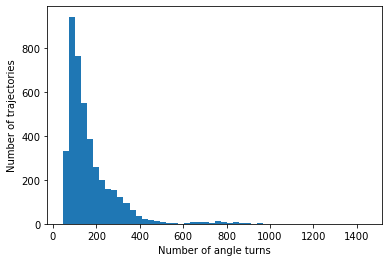

In [12]:
print(np.shape(np.mean(angles,axis=1)))
plt.hist(angs,bins=50)
plt.xlabel("Number of angle turns")
plt.ylabel("Number of trajectories")
plt.savefig("dir_changes.png")

(4197,)


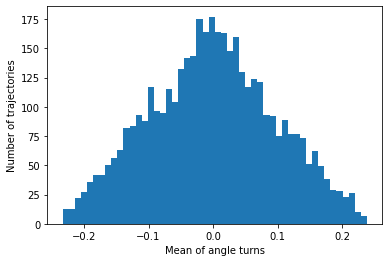

In [13]:
print(np.shape(np.mean(angles,axis=1)))
mean_angles = np.mean(angles,axis=1)
plt.hist(mean_angles,bins=50)
plt.xlabel("Mean of angle turns")
plt.ylabel("Number of trajectories")
plt.savefig("mean_angles.png")

In [14]:
np.std(angles)
# np.mean(angles)

29.12115269957274

(1, 1498)


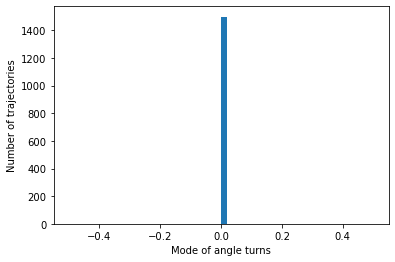

In [15]:
print(np.shape(stats.mode(angles)[0]))
mode_angles = stats.mode(angles)[0].flatten()
plt.hist(mode_angles,bins=50)
plt.xlabel("Mode of angle turns")
plt.ylabel("Number of trajectories")
plt.savefig("mode_angles.png")

(4197,)


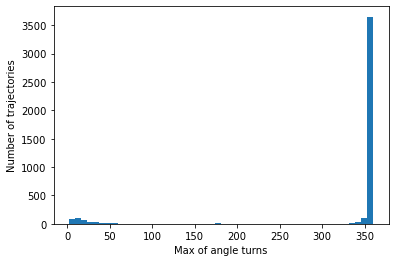

In [16]:
print(np.shape(np.max(angles,axis = 1)))
max_angles = np.max(angles,axis=1)
plt.hist(max_angles,bins=50)
plt.xlabel("Max of angle turns")
plt.ylabel("Number of trajectories")
plt.savefig("max_angles.png")

In [17]:
f_np = np.asarray(f)
f_np[:, 3] = [float(x) for x in f_np[:,3]]
f_np[:, 2] = [float(x) for x in f_np[:,2]]
f_np[:, 1] = [float(x) for x in f_np[:,1]]
print(np.shape(f_np))
print(f_np[0:10,3])

(6295500, 6)
[304.08 304.12 304.16 304.2  304.24 304.28 304.32 304.36 304.4  304.44]


In [18]:
f_np = np.asarray(f)
xs = np.subtract(f_np[0:-1,1],f_np[1:,1])
ys = np.subtract(f_np[0:-1,2],f_np[1:,2])
speed = np.divide(np.sqrt(np.add(np.power(xs, 2), np.power(ys, 2))),np.subtract(f_np[1:,3],f_np[:-1,3]))
#speed = (np.subtract(np.power((f_np[0:-1,1]-f_np[1:,1])^2 ,(f_np[0:-1,2]-f_np[1:,2])^2))#/(f_np[0:-1,3]-f_np[1:,3])
print(np.shape(speed))
speed = np.insert(speed, 0,0)
f['s'] = speed

(6295499,)


In [19]:
print(np.shape(f))

(6295500, 7)


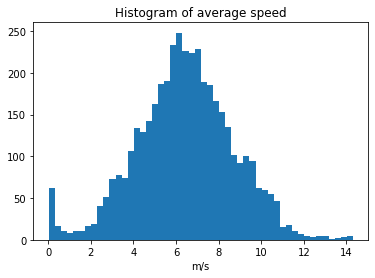

In [20]:
s_mean = f.groupby(['minute_id']).mean()['s']

plt.hist(s_mean,bins=50)
plt.title("Histogram of average speed")
plt.xlabel("m/s")
plt.savefig("av_speed.png")
plt.show()

In [21]:
print(f.keys())

Index(['minute_id', 'x', 'y', 't', 'id', 'tmp', 's'], dtype='object')


Index(['s'], dtype='object')
[4.876868872541091, 2.9494957196124805, 8.110342162934318, 7.827873274389306, 0.5230977442126875, 6.078889701255358, 4.51559796703805, 0.10003124511628197, 3.70856188433655, 8.028177330509173]


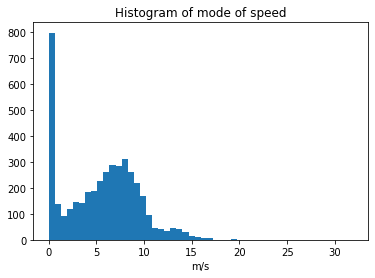

In [22]:
s_only = f[['minute_id','s']]
s_mean = s_only.groupby(['minute_id']).agg(lambda x:x.value_counts().index[0])
print(s_mean.keys())
# print(np.shape(s_mean['x']))

# print(s_mean['x'][0:10])

s_mean_rchoice = []
for x in s_mean['s']:
    try:
        if(np.shape(x)[0] > 1):
            s_mean_rchoice.append(np.random.choice(x))
        else:
            s_mean_rchoice.append(x)
    except:
        s_mean_rchoice.append(x)
        
print(s_mean_rchoice[0:10])

plt.hist(s_mean_rchoice,bins=50)
plt.title("Histogram of mode of speed")
plt.xlabel("m/s")
plt.savefig("mode_speed.png")
plt.show()

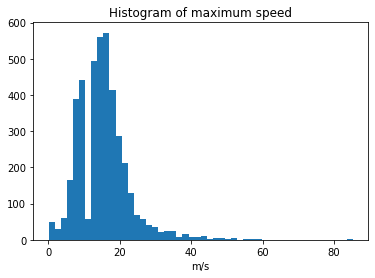

In [23]:
s_mean = f.groupby(['minute_id']).max()['s']

plt.hist(s_mean,bins=50)
plt.title("Histogram of maximum speed")
plt.xlabel("m/s")
plt.savefig("max_speed.png")
plt.show()

In [52]:
f_np = np.asarray(f)
xs = np.subtract(f_np[0:-1,1],f_np[1:,1])
ys = np.subtract(f_np[0:-1,2],f_np[1:,2])
speed = np.divide(np.subtract(np.power(xs, 2), np.power(ys, 2)),np.subtract(f_np[0:-1,3],f_np[1:,3]))
print(np.shape(speed))
acc = np.divide(np.subtract(f_np[1:,6], f_np[:-1,6]),np.subtract(f_np[1:,3],f_np[:-1,3]))
acc = np.insert(acc, 0,0)
f['a'] = acc

(6295499,)


In [53]:
angle = np.arctan2(np.subtract(f_np[0:-1,2],f_np[1:,2]),np.subtract(f_np[0:-1,1],f_np[1:,1]))
angle = np.insert(angle, 0,0)
deg = [math.degrees(x) for x in angle]
f['ang'] = deg

In [54]:
print(max(deg))

180.0


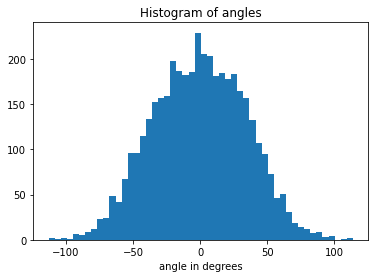

In [55]:
ang_mean = f.groupby(['minute_id']).mean()['ang']

plt.hist(ang_mean,bins=50)
plt.title("Histogram of angles")
plt.xlabel("angle in degrees")
plt.savefig("av_ang.png")
plt.show()

In [23]:
# v_mean = f.groupby(['minute_id']).mean()['v']

# plt.hist(v_mean,bins=50)
# plt.title("Histogram of average velocities")
# plt.savefig("av_vel.png")
# plt.show()

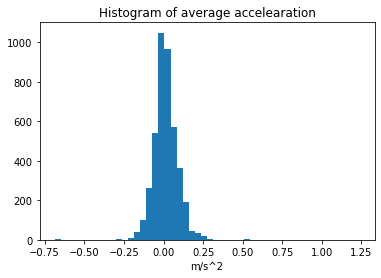

In [56]:
a_mean = f.groupby(['minute_id']).mean()['a']

plt.hist(a_mean,bins=50)
plt.title("Histogram of average accelearation")
plt.xlabel("m/s^2")
plt.savefig("av_acc.png")
plt.show()

Index(['a'], dtype='object')
[2.152669323909726, -1.8713517097921495, 0.09649251856335754, -2.9543466314533755, -0.830334888397344, -4.991277927875076, 1.2287199817697145, 4.087624693062738, -1.2956853222741775, -2.092175359247632]


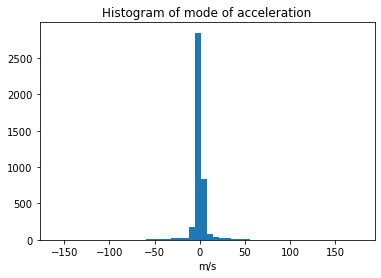

In [57]:
s_only = f[['minute_id','a']]
s_mean = s_only.groupby(['minute_id']).agg(lambda x:x.value_counts().index[0])
print(s_mean.keys())
# print(np.shape(s_mean['x']))

# print(s_mean['x'][0:10])

s_mean_rchoice = []
for x in s_mean['a']:
    try:
        if(np.shape(x)[0] > 1):
            s_mean_rchoice.append(np.random.choice(x))
        else:
            s_mean_rchoice.append(x)
    except:
        s_mean_rchoice.append(x)
        
print(s_mean_rchoice[0:10])

plt.hist(s_mean_rchoice,bins=50)
plt.title("Histogram of mode of acceleration")
plt.xlabel("m/s")
plt.savefig("mode_acceleration.png")
plt.show()

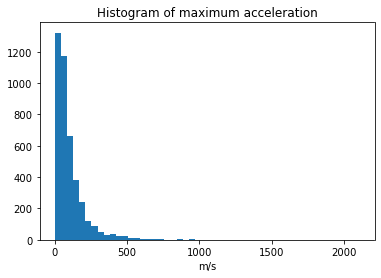

In [61]:
s_mean = f.groupby(['minute_id']).max()['a']

plt.hist(s_mean,bins=50)
plt.title("Histogram of maximum acceleration")
plt.xlabel("m/s")
plt.savefig("max_acceleration.png")
plt.show()

In [25]:
dt = np.asarray(100*f['t'])
f['datetime'] = dt

In [26]:
tdf = skmob.TrajDataFrame(f, latitude='x',longitude='y',datetime="datetime", user_id='minute_id')

In [27]:
tdf.head()

,uid,lat,lng,t,id,tmp,s,a,ang,datetime
0,1,2085.328,662.2738,304.08,1.0,NaN,0.000000,0.000000,0.000000,1970-01-01 00:00:00.000030408
1,1,2085.488,662.2914,304.12,1.0,0.040009,4.024127,100.603181,-173.722702,1970-01-01 00:00:00.000030412
2,1,2085.695,662.3420,304.16,1.0,0.040009,5.327368,32.581020,-166.263732,1970-01-01 00:00:00.000030416
3,1,2085.932,662.4187,304.20,1.0,0.040009,6.227554,22.504654,-162.066931,1970-01-01 00:00:00.000030420
4,1,2086.202,662.5214,304.24,1.0,0.039978,7.221811,24.856424,-159.174668,1970-01-01 00:00:00.000030424


In [28]:
dsl_df = distance_straight_line(tdf)

100%|██████████| 4197/4197 [00:37<00:00, 110.58it/s]


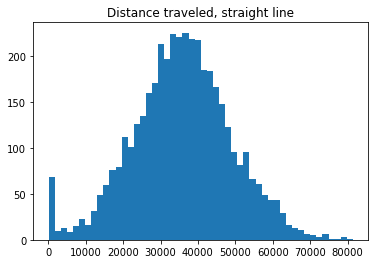

In [29]:
plt.hist(dsl_df["distance_straight_line"],bins = 50)
plt.title("Distance traveled, straight line")
plt.savefig("tot_dist.png")

In [30]:
md_df = maximum_distance(tdf)

100%|██████████| 4197/4197 [00:37<00:00, 113.14it/s]


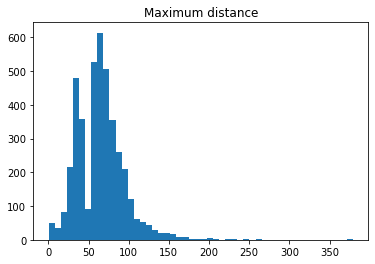

In [31]:
plt.hist(md_df['maximum_distance'],bins=50)
plt.title("Maximum distance")
plt.savefig("max_dist.png")

In [32]:
# re_df = real_entropy(tdf)
# plt.hist(re_df["real_entropy"])
# plt.title("Real Entropy")
print(np.shape(f)[0]/1500)

4197.0


In [33]:
#Distance from Straight Line
d = []
step_size = 50
for i in tqdm(range(1,4197)):
    d_tmp = 0
    for j in range(1,1499,50):
        p1 = f[f['minute_id']==i].iloc[0][['x','y']]
        p2 = f[f['minute_id']==i].iloc[1499][['x','y']]
        p3 = f[f['minute_id']==i].iloc[j][['x','y']]
        d_tmp += norm(np.cross(p2-p1, p1-p3))/norm(p2-p1)
    d.append(d_tmp)

100%|██████████| 4196/4196 [47:00<00:00,  1.49it/s]  


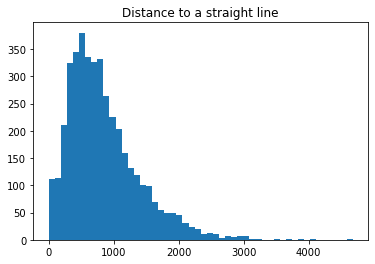

In [34]:
plt.hist(d,bins = 50)
plt.title("Distance to a straight line")
plt.savefig("Straight_Line_Distance.png")

In [35]:
# Crossings Check
num_crossings = []
# for i in tqdm(range(1,2373)):
i = 3
id_crossings = 0
for j in tqdm(range(1500)):
    for k in range(j,1500):
        if(math.dist(f[f['minute_id']==i].iloc[j][['x','y']], f[f['minute_id']==i].iloc[k][['x','y']]) < 1):
            id_crossings += 1
num_crossings.append(id_crossings)

  4%|▎         | 54/1500 [19:59<8:55:13, 22.21s/it] 


KeyboardInterrupt: 

In [ ]:
plt.hist(num_crossings)

In [ ]:
plt.plot(f[f["minute_id"]==3]['x'],f[f["minute_id"]==5]['y'])

In [ ]:
df = traja.read_file('../../Minute_Trajectories_3.csv')

In [ ]:
f['angles'] = traja.trajectory.calc_angle(df)

In [ ]:
ang_mean = f.groupby(['minute_id']).mean()['angles']

plt.hist(ang_mean,bins=50)
plt.title("Histogram of average angle")
plt.savefig("av_angle.png")
plt.show()

In [ ]:
print(f['angles'])

In [ ]:
#autocorr_angle = np.correlate(f['angles'][~np.isnan(f['angles'])],f['angles'][~np.isnan(f['angles'])],mode="full")


In [ ]:
#plt.hist(autocorr_angle[~np.isnan(autocorr_angle)])

In [60]:
newa = f[['x','y','minute_id']]
newa = np.asarray(newa)
counts = []
for plotid in tqdm(np.unique(f['minute_id'])):
    c = get_crossings(newa[newa[:,2]==plotid])
    counts.append(c)

100%|██████████| 4197/4197 [22:04:37<00:00, 18.94s/it]        


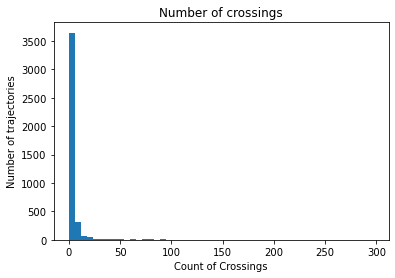

In [61]:
plt.hist(counts,bins=50)
plt.xlabel("Count of Crossings")
plt.ylabel("Number of trajectories")
plt.title("Number of crossings")
plt.savefig("Crossings.png")

In [38]:
newa[newa[:,1]==1][:,0]

array([], dtype=float64)

In [39]:
newa = f[['ang','minute_id']]
newa = np.asarray(newa)
dir_changes = []
for plotid in tqdm(np.unique(f['minute_id'])):
    c = get_change_dir(newa[newa[:,1]==plotid][:,0])
    dir_changes.append(c)

100%|██████████| 4197/4197 [02:12<00:00, 31.65it/s]


In [40]:
print(np.shape(dir_changes))

(4197,)


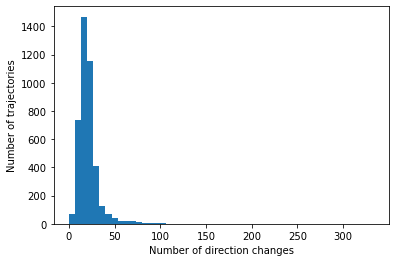

In [41]:
plt.hist(dir_changes,bins=50)
plt.xlabel("Number of direction changes")
plt.ylabel("Number of trajectories")
plt.savefig("Direction_Changes.png")

In [82]:
newa = f[['x','y','minute_id']]
newa = np.asarray(newa)
max_dists = []
for plotid in tqdm(np.unique(f['minute_id'])):
    c = newa[newa[:,2]==plotid]
#     print(np.shape(c))
#     dir_changes.append(c)

    xs = np.subtract(c[0,0],c[:,0])
    ys = np.subtract(c[0,1],c[:,1])
    dists = np.sqrt(np.add(np.power(xs, 2), np.power(ys, 2)))
    m = max(dists)
    
    max_dists.append(m)

100%|██████████| 4197/4197 [01:17<00:00, 53.85it/s]


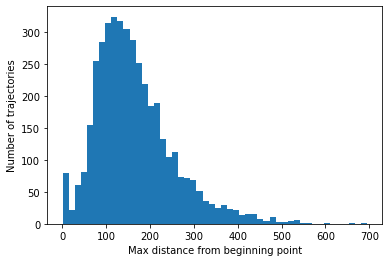

In [83]:
plt.hist(max_dists, bins=50)
plt.xlabel("Max distance from beginning point")
plt.ylabel("Number of trajectories")
plt.savefig("Max_dist_from_start.png")

In [48]:
newa = f[['x','y','minute_id']]
newa = np.asarray(newa)
max_dists = []
areas = []
for plotid in tqdm(np.unique(f['minute_id'])):
    c = newa[newa[:,2]==plotid]
    area = triangle_area(c,step_size=250)
    areas.append(area)

100%|██████████| 4197/4197 [01:35<00:00, 44.16it/s]


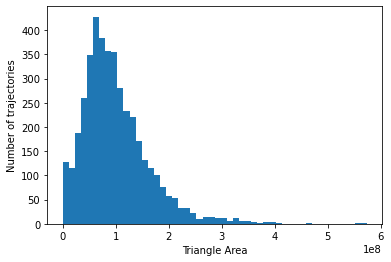

In [49]:
plt.hist(areas, bins=50)
plt.xlabel("Triangle Area")
plt.ylabel("Number of trajectories")
plt.savefig("triangle_area.png")

In [46]:
#Step size test
test_traj = newa[newa[:,2]==1]
area_size = []
for i in tqdm(range(1,500)):
    areas = []
    for plotid in range(10):
        c = newa[newa[:,2]==plotid]
        area = triangle_area(c,step_size =i)
        areas.append(area)
    area_size.append(np.mean(areas))


100%|██████████| 499/499 [01:51<00:00,  4.46it/s]


In [1]:
#Take peak and recompute
plt.plot(area_size)
plt.ylabel("Triangle Area")
plt.xlabel("Step Size")
plt.savefig("Triangle_step_size.png")

NameError: name 'plt' is not defined

In [ ]:
plt.plot(area_size)

In [65]:
crossing_dat = pd.DataFrame(counts, columns=["crossings"])

In [67]:
crossing_dat.to_csv("crossings.csv")

In [59]:
total_data_ids = ['id','average_speed','average_angle','average_acceleration','dist_traveled','max_dist','dist_to_line','direction_changes','max_dist_start','triangle_area']



In [84]:
ids = np.arange(4197)
av_spd = s_mean
av_angle = ang_mean
av_acc = a_mean
dist_t = dsl_df["distance_straight_line"]
max_dist = md_df['maximum_distance']
dist_line = d
dir_changes = dir_changes
max_dist_s = max_dists
t_a = areas

In [86]:
print(np.shape(areas))

(4197,)


In [87]:
out_df = pd.DataFrame(list(zip(ids, av_spd, av_angle, av_acc, dist_t, max_dist,dist_line,dir_changes,max_dist_s, t_a)),columns =total_data_ids)




In [88]:
out_df.head()

,id,average_speed,average_angle,average_acceleration,dist_traveled,max_dist,dist_to_line,direction_changes,max_dist_start,triangle_area
0,0,4.416393,-3.590761,0.089033,25428.339401,40.224899,461.055826,23,186.505379,1.552998e+07
1,1,5.309256,40.235392,-0.010351,27286.793436,37.752912,1080.610753,13,145.573671,6.896034e+07
2,2,5.748886,57.630207,0.034656,33376.600945,37.862896,374.124640,16,190.448758,1.304189e+08
3,3,6.566597,51.788516,0.020437,31251.441576,37.029236,664.359617,11,220.428114,1.338914e+08
4,4,6.739817,29.174585,-0.029459,37712.573219,58.654360,903.642218,14,212.700705,1.077504e+08


In [89]:
out_df.to_csv("overview_minute.csv")